In [1]:
from IPython.display import Image
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import numpy as np


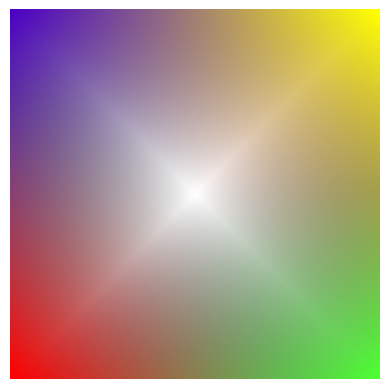

In [2]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# Specify the path to your local image file
image_path = r"C:\Users\Mach6\Desktop\grad.png"

# Open the image
img = PILImage.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # to hide the axis
plt.show()

In [3]:
plt.get_cmap

<function matplotlib.pyplot.get_cmap(name: 'Colormap | str | None' = None, lut: 'int | None' = None) -> 'Colormap'>

Problems 
1. Write a recurrsive function to split the image into smaller chunks. 
  1. The function base case is a function of MAX_LEVEL
2. Write a function that visits each leaf and performs an operation to simplify the data at the node. For example:
NewPixel = $\Sigma p_i/N$, where $p_i$ is the integer value of the $i^{th}$ pixel and $N$ is the total number of pixels. 
1. Write a function which plots the transformed image at given level, the leaf level is the most interesting to start with.

DO AT LEAST ONE OF THE FOLLOWING AND EXTRA CREDIT 
1. Rewrite the system to stop recursion when the 'variation' in the data in a node is below a threshold. For instance, the standard deviation is below some value.
2. Write a plotter for the above 'adaptative' quad-tree. 
3. Write a function which determines the 'error' of the compressed image. In a docstring explain the logic of your functiona and it is a good representation of error. 


In [4]:
img = np.asarray(img)
height, width, channels = img.shape
height, width, channels

(1024, 1024, 4)

In [5]:
bw = lambda x: (x[0]*0.2125+x[1]*0.7174+x[2]*0.0721)
bwimg = np.asarray([[bw(img[h,w,:]) for w in range(width)] for h in range(height)])



(-0.5, 1023.5, 1023.5, -0.5)

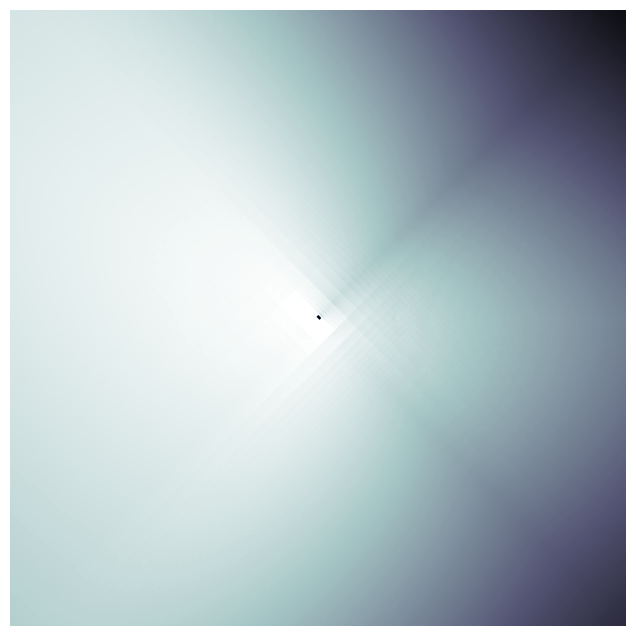

In [6]:
scale = 128
plt.imshow(bwimg,cmap=plt.get_cmap("bone_r"))
plt.gcf().set_size_inches(height/scale, width/scale)
plt.axis('off')

In [7]:
np.mean(bwimg),np.std(bwimg),np.max(bwimg),np.min(bwimg), bwimg.itemsize*width*height

(68.0777680650711, 53.147552693976415, 255.51000000000002, 0.0, 8388608)

Above we have taken a gradient of colors and transformed it into a black and white representation. 
The black and white representation reduces the "RGB" channels from three values to one values. This reduction will make live easier in the near future. 


For this assignment, you need to use a quad-tree structure to $aggregate$ neighboring pixels. This can be extended to more clever ideas, but we will start with the easiest methods. 

In [8]:
MAX_LEVELS = 1

class QT: #quad tree  
  def __init__(self, x0, x1, y0, y1, data, level=0):
    self.x0 = x0
    self.x1 = x1
    self.y0 = y0
    self.y1 = y1
    self.level = level
    self.data = data
    self.kids  = []
    self.split_domain()

  def split_domain(self):
    if self.level < MAX_LEVELS:
      xm = (self.x1 + self.x0) // 2
      ym = (self.y1 + self.y0) // 2

      NW = QT(self.x0, xm, ym, self.y1, self.data[ym:self.y1, self.x0:xm], self.level+1)
      NE = QT(xm, self.x1, ym, self.y1, self.data[ym:self.y1, xm:self.x1], self.level+1)
      SW = QT(self.x0, xm, self.y0, ym, self.data[self.y0:ym, self.x0:xm], self.level+1)
      SE = QT(xm, self.x1, self.y0, ym, self.data[self.y0:ym, xm:self.x1], self.level+1)
      self.kids = [NW, NE, SW, SE]

  def __repr__(self):
    out = f"\t"*self.level + f"L{self.level}  [{self.x0}->{self.x1}, {self.y0}->{self.y1}]" + \
          f" #pixels = {self.data.shape} \n"
    for k in self.kids:
      out += k.__repr__()
    return out



In [9]:
qt = QT(0,width,0,height,bwimg)
qt

L0  [0->1024, 0->1024] #pixels = (1024, 1024) 
	L1  [0->512, 512->1024] #pixels = (512, 512) 
	L1  [512->1024, 512->1024] #pixels = (512, 512) 
	L1  [0->512, 0->512] #pixels = (512, 512) 
	L1  [512->1024, 0->512] #pixels = (512, 512) 

In [10]:
qt.split_domain()
qt

L0  [0->1024, 0->1024] #pixels = (1024, 1024) 
	L1  [0->512, 512->1024] #pixels = (512, 512) 
	L1  [512->1024, 512->1024] #pixels = (512, 512) 
	L1  [0->512, 0->512] #pixels = (512, 512) 
	L1  [512->1024, 0->512] #pixels = (512, 512) 